# INSTAGRAM REACH ANALYSIS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor

In [7]:
df=pd.read_csv('/content/Screentime-App-Details.csv')

In [10]:
df.shape

(54, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           54 non-null     object
 1   Usage          54 non-null     int64 
 2   Notifications  54 non-null     int64 
 3   Times opened   54 non-null     int64 
 4   App            54 non-null     object
dtypes: int64(3), object(2)
memory usage: 2.2+ KB


In [9]:
df.describe()

,Usage,Notifications,Times opened
count,54.000000,54.000000,54.000000
mean,65.037037,117.703704,61.481481
std,58.317272,97.017530,43.836635
min,1.000000,8.000000,2.000000
25%,17.500000,25.750000,23.500000
50%,58.500000,99.000000,62.500000
75%,90.500000,188.250000,90.000000
max,244.000000,405.000000,192.000000


In [11]:
df.isnull().sum()

Date             0
Usage            0
Notifications    0
Times opened     0
App              0
dtype: int64

In [12]:
df.duplicated().sum()

0

From Describe function we can say that there are outliers after maximum values.


<Axes: >

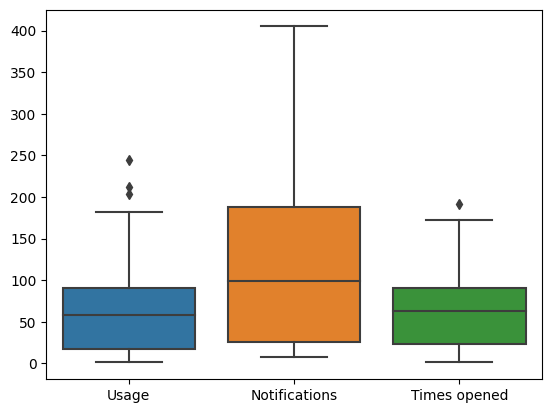

In [13]:
sns.boxplot(data=df)

To check for skewness to decide between median or mean we use distplot

<ipython-input-14-9765c522e61b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Usage'])


<Axes: xlabel='Usage', ylabel='Density'>

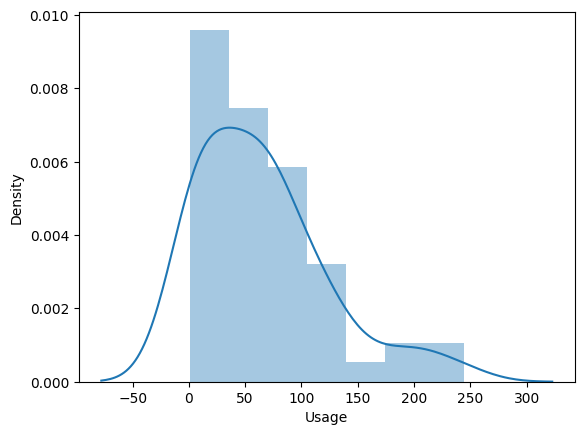

In [14]:
sns.distplot(df['Usage'])

<ipython-input-15-17fabbda5359>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Times opened'])


<Axes: xlabel='Times opened', ylabel='Density'>

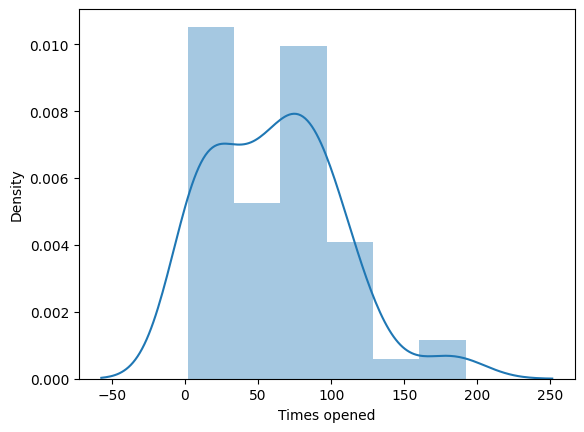

In [15]:
sns.distplot(df['Times opened'])

Without a doubt it is right skewed so we have to use median

IQR METHOD OUTLIER TREATMENT FOLLOWED BY
TRIMMING AND CAPPING

In [16]:
q1=df['Usage'].quantile(0.25)
q3=df['Usage'].quantile(0.75)
IQR=q3-q1
min=q1-1.5*IQR
max=q3+1.5*IQR
df=df[(df['Usage']<min) & (df['Usage']>max)]
df['Usage']=np.where(df['Usage']>max,max,np.where(df['Usage']<min,min,df['Usage']))

In [17]:
q1=df['Times opened'].quantile(0.25)
q3=df['Times opened'].quantile(0.75)
IQR=q3-q1
min=q1-1.5*IQR
max=q3+1.5*IQR
df=df[(df['Times opened']<min) & (df['Times opened']>max)]
df['Times opened']=np.where(df['Times opened']>max,max,np.where(df['Times opened']<min,min,df['Usage']))

In [19]:
df1=pd.read_csv('/content/Screentime-App-Details.csv')

In [20]:
df1.isnull().sum()

Date             0
Usage            0
Notifications    0
Times opened     0
App              0
dtype: int64

In [22]:
df1.duplicated().sum()

0

In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           54 non-null     object
 1   Usage          54 non-null     int64 
 2   Notifications  54 non-null     int64 
 3   Times opened   54 non-null     int64 
 4   App            54 non-null     object
dtypes: int64(3), object(2)
memory usage: 2.2+ KB


In [24]:
df1.describe()

,Usage,Notifications,Times opened
count,54.000000,54.000000,54.000000
mean,65.037037,117.703704,61.481481
std,58.317272,97.017530,43.836635
min,1.000000,8.000000,2.000000
25%,17.500000,25.750000,23.500000
50%,58.500000,99.000000,62.500000
75%,90.500000,188.250000,90.000000
max,244.000000,405.000000,192.000000


In [25]:
df1.head()

,Date,Usage,Notifications,Times opened,App
0,08/26/2022,38,70,49,Instagram
1,08/27/2022,39,43,48,Instagram
2,08/28/2022,64,231,55,Instagram
3,08/29/2022,14,35,23,Instagram
4,08/30/2022,3,19,5,Instagram


Label Encoding

In [31]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df1['App']= label_encoder.fit_transform(df1['App'])
df1['App'].unique()

array([0, 1])

In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           54 non-null     object
 1   Usage          54 non-null     int64 
 2   Notifications  54 non-null     int64 
 3   Times opened   54 non-null     int64 
 4   App            54 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 2.2+ KB


Amount of usage of the apps

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, '08/26/2022'),
  Text(1, 0, '08/27/2022'),
  Text(2, 0, '08/28/2022'),
  Text(3, 0, '08/29/2022'),
  Text(4, 0, '08/30/2022'),
  Text(5, 0, '08/31/2022'),
  Text(6, 0, '09/01/2022'),
  Text(7, 0, '09/02/2022'),
  Text(8, 0, '09/03/2022'),
  Text(9, 0, '09/04/2022'),
  Text(10, 0, '09/05/2022'),
  Text(11, 0, '09/06/2022'),
  Text(12, 0, '09/07/2022'),
  Text(13, 0, '09/08/2022'),
  Text(14, 0, '09/09/2022'),
  Text(15, 0, '09/10/2022'),
  Text(16, 0, '09/11/2022'),
  Text(17, 0, '09/12/2022'),
  Text(18, 0, '09/13/2022'),
  Text(19, 0, '09/14/2022'),
  Text(20, 0, '09/15/2022'),
  Text(21, 0, '09/16/2022'),
  Text(22, 0, '09/17/2022'),
  Text(23, 0, '09/18/2022'),
  Text(24, 0, '09/19/2022'),
  Text(25, 0, '09/20/2022'),
  Text(26, 0, '09/21/2022')])

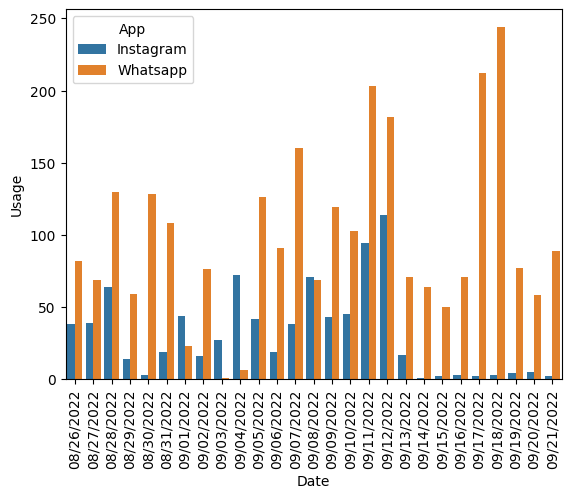

In [42]:
df2=pd.read_csv('/content/Screentime-App-Details.csv')
sns.barplot(x='Date',y='Usage',hue='App',data=df2)
plt.xticks(rotation=90)

In [48]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           54 non-null     object
 1   Usage          54 non-null     int64 
 2   Notifications  54 non-null     int64 
 3   Times opened   54 non-null     int64 
 4   App            54 non-null     object
dtypes: int64(3), object(2)
memory usage: 2.2+ KB


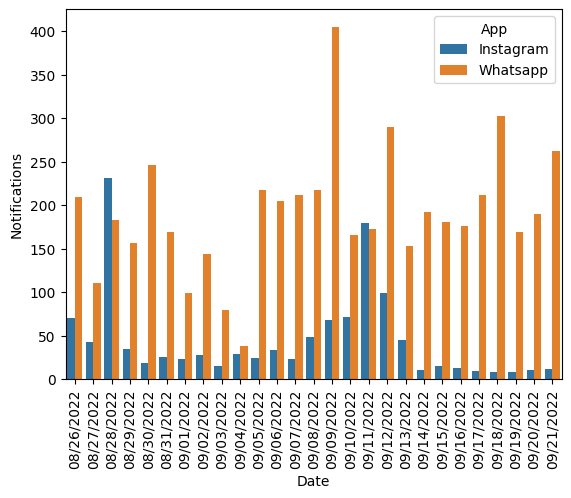

In [47]:
sns.barplot(x='Date',y='Notifications',hue='App',data=df2)
plt.xticks(rotation=90)
plt.show()

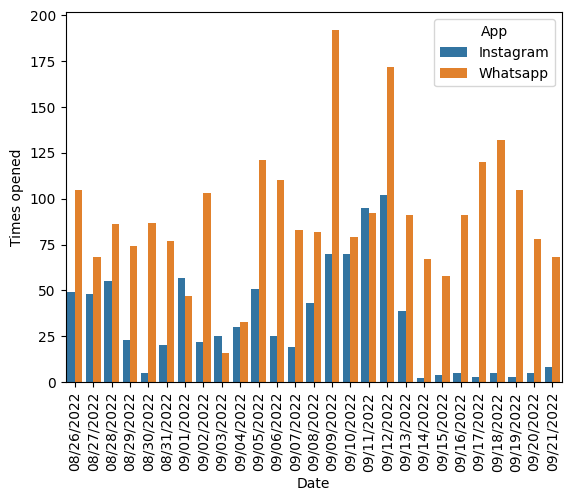

In [50]:
sns.barplot(x='Date',y='Times opened',hue='App',data=df2)
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='Notifications', ylabel='Usage'>

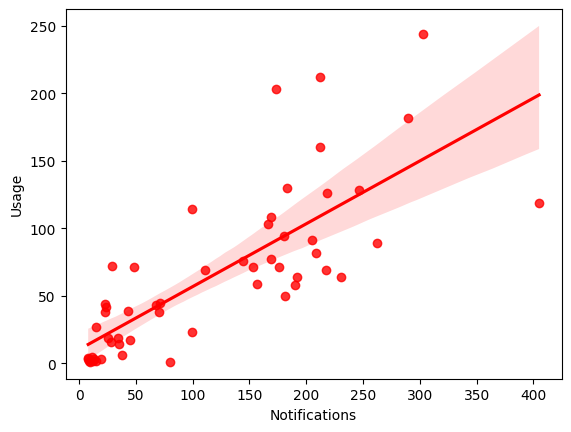

In [56]:
sns.regplot(x='Notifications',y='Usage',color='Red',data=df2)

<Axes: xlabel='Notifications', ylabel='Times opened'>

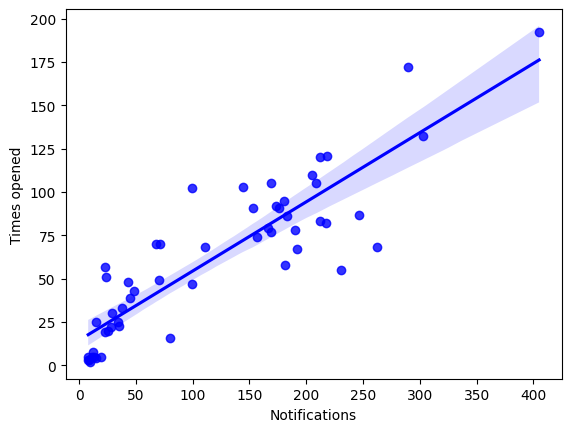

In [55]:
sns.regplot(x='Notifications',y='Times opened',color='Blue',data=df2)

<ipython-input-59-7caa5c7aec74>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df2.corr(),annot=True)


<Axes: >

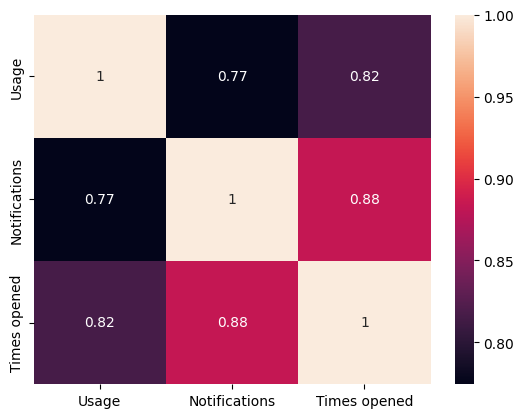

In [59]:
sns.heatmap(df2.corr(),annot=True)

We see a linear relationship between
Notifications and Times Opened
Notifications and Usage

Hence We can infer more notifications more is the times the app is opened and usage